# TP 1 : Recherche d'extremum et interpolation de Lagrange

Dans ce TP, nous allons :

1. rechercher un extremum d'une fonction `f` ;
2. tenter d'approcher cette fonction par un polynôme interpolateur (qui passera notamment par l'extremum trouvé).

Et en bonus, nous allons étudier une fonction très utile en sciences.

Pour l'instant, nous allons utiliser la fonction `f` (et sa dérivée `f_prime`) sans nous soucier de sa définition.

Il suffit pour cela de les importer du module `mystere` ainsi :

In [ ]:
from mystere import f, f_prime

#### Exercice 1 : graphe de la fonction

Tout d'abord, nous allons afficher le graphe de `f`, en prenant en abscisses 100 valeurs dans un intervalle donné.

Le code suivant considère l'intervalle $[0 ; 1]$.  Modifiez-le pour un affichage sur l'intervalle $[-1 ; +3]$.

In [ ]:
# installation de la librairie matplotlib 
# (à n'exécuter qu'une seule fois)
!pip3 install matplotlib

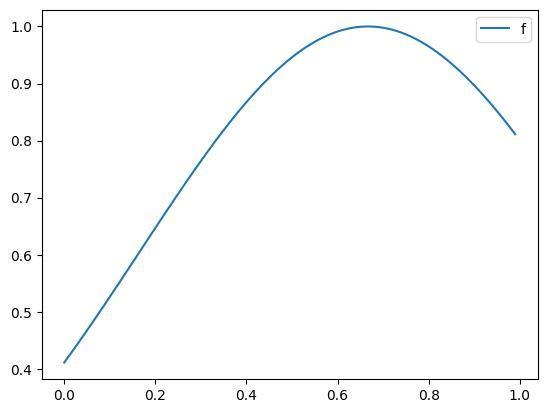

In [12]:
import matplotlib.pyplot as plot

# affichage du graphe

N = 100  # nombre de points dans le graphe

X = []  # liste des abscisses des points
Y = []  # liste des ordonnées des points
for i in range(N):
    x = i/N  # à modifier
    #x = -1+4*i/N  # solution
    y = f(x)
    X.append(x)  # rajoute la valeur x à la liste X
    Y.append(y)  # rajoute la valeur y à la liste Y
plot.plot(X, Y, label="f")
plot.legend()
plot.show()

#### Exercice 2 : recherche d'extremum

Il nous faut maintenant trouver l'abscisse du maximum de la fonction `f`.

Cela peut se faire à une erreur $\epsilon$ (`EPSILON`) près en recherchant par dichtomie la racine de sa dérivée `f_prime` sur l'intervalle sur l'intervalle $[-1 ; +3]$.

Complétez le code suivant :

In [5]:
EPSILON = 0.001

def dichotomie(fun, a, b):
    while True:  # Python n'ayant pas de structure do...while
        m = (a + b) / 2
        if (b - a) < EPSILON:
            break
        if fun(a) * fun(m) > 0:
            a = m  
        else:
            b = m 
    return m


# Autre version
def dichotomie2(f, a, b, epsilon):
    m = (a + b)/2
    while abs(a - b) > epsilon:
        if f(m) == 0.:
            return m
        elif f(a)*f(m) > 0:
            a = m
        else:
            b = m
        m = (a + b)/2
    return m

# calcul et affichade de la racine r
# à compléter
r = dichotomie(f_prime, -1, +3)  # solution
print(r)

0.66650390625


#### Exercice 3  : interpolation de Lagrange

On se donne $n+1$ points $(x_0, y_0), \cdots, (x_n, y_n)$ (avec les $x_i$ distincts deux à deux).

On rappelle (voir TD) qu'il existe un unique polynôme de degré $n$ qui, aux abscisses $x_i$ prend les valeurs $y_i$ (on dit que le polynôme est interpolateur).

Ce polynôme, appelé **polynôme de Lagrange**, est défini par la formule suivante : 
$$P(x) = \sum_{k=0}^{n}y_k    L_k (x) \quad \text{ avec } \quad L_k(x)= {\prod_{i=0, i \ne k}^{n}\frac{x-x_i}{x_k-x_i}}$$

Complétez la fonction `lagrange` suivante pour qu'elle calcule la valeur du polynôme en question pour la valeur $x$ :

In [6]:
# Polynôme interpolateur de Lagrange 
# Entrée : 
    # X représente la liste des abscisses x0,x1,...xn
    # Y représente la liste des ordonnées y0,y1,...,yn
    # x une valeur numérique

# Sortie : 
    # s designe la valeur du polynôme d'interpolation de Lagrange P en x

def lagrange(X, Y, x):
    assert(len(X) == len(Y))
    s = 0
    # solution
    for k in range(len(Y)):
        Lk = 1
        for i in range(len(X)):
            if i != k:
                Lk *= (x - X[i]) / (X[k] - X[i])
        s += Y[k] * Lk
    return s

On va maintenant utiliser ce polynôme avec les points suivants :

In [7]:
# les 3 points en entrée : 
# le polynôme de Lagrange sera de degré 2 (soit une parabole)

Xe = [ 0.0, r, 1.0 ]   # 3 points
Ye = [ f(Xe[0]), f(Xe[1]), f(Xe[2]) ]

il suffit alors d'exécuter le code suivant afin d'afficher l'approximation de la fonction

(a priori sur l'intervalle $[0 ; 1]$, mais on peut essayer aussi sur l'intervalle $[-1 ; +3]$ pour voir le comportement du polynôme) :

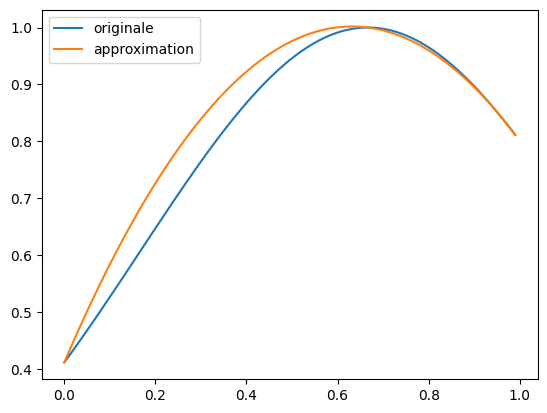

In [13]:
# affichage de l'approximation sur [0,1]

# les points en sortie (interpolés)
Xl = []
Yl = []
for i in range(N):
    x = i/N
    y = lagrange(Xe, Ye, x)  # approximation
    Xl.append(x)
    Yl.append(y)  # valeur approchée

plot.plot(X, Y, label="originale")
plot.plot(Xl, Yl, label="approximation")
plot.legend()
plot.show()

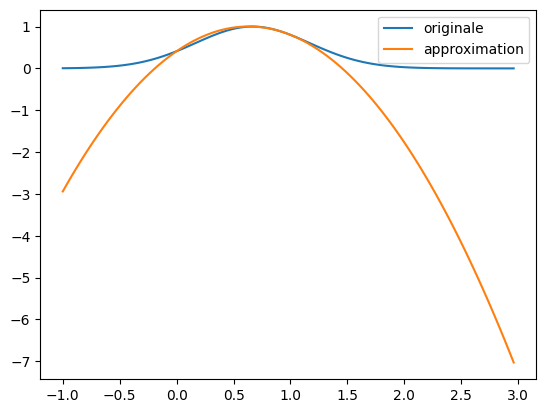

In [16]:
# affichage de l'approximation sur [-1,3]
N = 100  # nombre de points dans le graphe

X = []  # liste des abscisses des points
Y = []  # liste des ordonnées des points
for i in range(N):
    x = -1+i*4/N
    y = f(x)
    X.append(x)  # rajoute la valeur x à la liste X
    Y.append(y)  # rajoute la valeur y à la liste Y


# les points en sortie (interpolés)
Xl = []
Yl = []
for i in range(N):
    x = -1+i*4/N
    y = lagrange(Xe, Ye, x)  # approximation
    Xl.append(x)
    Yl.append(y)  # valeur approchée

plot.plot(X, Y, label="originale")
plot.plot(Xl, Yl, label="approximation")
plot.legend()
plot.show()

#### Exercice 4  : une variante...

On voit bien une différence entre l'originale et son approximation.

En fait, si l'approximation par un polynôme n'est pas exacte, c'est normal : la fonction `f` d'origine n'est pas un polynôme...

Mais avec ce qui suit nous allons deviner sa nature.



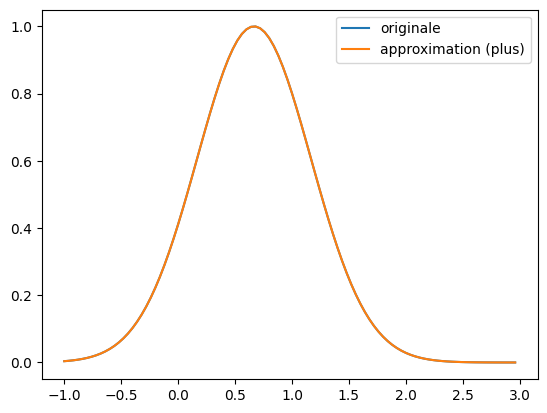

In [17]:
from math import log, exp

# interpolation de Lagrange sur le log

def lagrange_plus(X, Y, x):
    Y_log = [ ]
    for y in Y:
        Y_log.append(log(y))
    v = lagrange(X, Y_log, x)  # approximation du log
    return exp(v)  # retour en échelle linéaire car exp(log(x)) == x

# affichage de l'approximation sur le log

Xl = []
Yl = []
for i in range(N):
    x = -1+i*4/N
    y = lagrange_plus(Xe, Ye, x)  # approximation sur le log
    Xl.append(x)
    Yl.append(y)  # valeur

plot.plot(X, Y, label="originale")
plot.plot(Xl, Yl, label="approximation (plus)")
plot.legend()
plot.show()       

Visuellement il semblerait que les courbes (originale et approximation) soient confondues.

Nous allons vérifier cela en affichant l'erreur (la différence entre l'approximation et l'originale).

Cela peut se faire ainsi :

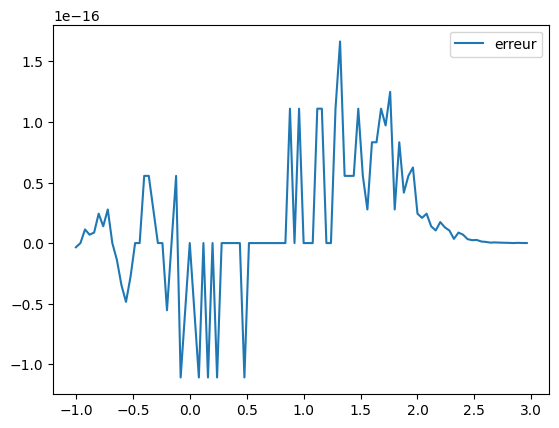

In [18]:
# affichage de l'erreur d'approximation

Xi = []
Yi = []
for i in range(N):
    x = i/(N/4)-1
    y = lagrange_plus(Xe, Ye, x)  # approximation du log
    Xi.append(x)
#    Yi.append(y)  # valeur
    Yi.append(y-f(x))  # erreur

plot.plot(Xi, Yi, label="erreur")
plot.legend()
plot.show()

On voit maintenant apparaître une erreur en pratique (très petite, car de l'ordre de ${10}^{-16}$).

En fait, c'est dû à l'imprécision des calculs en virgule flottante, car en théorie cette erreur est bien nulle.

C'est donc que le logarithme de la fonction mystère `f` est un polynôme de degré $2$...

Plus précisément, `f` est l'exponentielle d'un polynôme de degré $2$ :
$$f(x) = a \exp\left(-\frac{{(x-b)}^2}{2c^2}\right)$$
avec ici $a = 1$ (ordonnée du maximum),

$b = 2/3$ (abscisse du maximum, $r$ étant sa valeur approchée trouvée par dichotomie)

et $c = 0.5$ (écart type permettant de contrôler la forme de la fonction).

Cette fonction est connue sous le nom de Gaussienne.

Complétez le code suivant pour la fonction `f` (avec la définition de la Gaussienne donc) :

In [ ]:
# paramètres de la Gaussienne

a = 1    # ordonnée du maximum
b = 2/3  # abscisse du maximum
c = 0.5  # écart type

# la Gaussienne

def f(x):
    # à compléter
    # solution
    return a * exp(-pow(x-b,2)/(2*pow(c,2)))

# et sa derivée (pour les courageux)

def f_prime(x):
    # à compléter
    # solution
    return 2*a*(x-b)/(2*pow(c,2)) * f(x)

Pour vérifier, vous pouvez maintenant relancer le TP à partir de l'**Exercice 1**, sans utiliser le module `mystere`.

(et si cela change quelque chose, c'est que vos fonctions `f` ou `f_prime` sont fausses)